### Downloading and Preparing the "New Plant Diseases Dataset" from Kaggle



In [1]:
! pip install kaggle

from google.colab import files

files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download vipoooool/new-plant-diseases-dataset

! unzip /content/new-plant-diseases-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665_270deg.JPG  
  inflating: new plant diseases dataset(augmented)/New 


### Importing Libraries for Data Processing, Visualization, and Model Building

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import os
from pathlib import Path
import random



import tensorflow as tf
from tensorflow.keras import models, layers

from PIL import Image

from timeit import default_timer as timer

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

### Checking TensorFlow Installation and Summarizing the Model

In [3]:

try:
    from tensorflow.keras.utils import plot_model
    print("[INFO] TensorFlow imported successfully")
except ImportError:

    print("[INFO] TensorFlow not found. Installing it.")
    %pip install -q tensorflow
    from tensorflow.keras.utils import plot_model
    print("[INFO] TensorFlow installed and imported successfully.")


def summarize_model(model):
    try:
        print("[INFO] Model Summary:")
        model.summary()
    except Exception as e:
        print(f"[ERROR] Unable to summarize the model: {e}")


[INFO] TensorFlow imported successfully


### Defining and Printing the Dataset Directory Path

In [4]:
dataset_dir = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

print(dataset_dir)

/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train


### Exploring Dataset Directory and Counting Image Files by Class

In [5]:
dataset_dir = Path(r"/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)")


print(dataset_dir)
for dirname, _, filenames in os.walk(dataset_dir):

    num_images = sum(1 for filename in filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg')))


    if num_images:
        relative_path = os.path.relpath(dirname, dataset_dir)
        print(f"{relative_path} : {num_images}")

/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)
valid/Potato___healthy : 456
valid/Tomato___Target_Spot : 457
valid/Grape___healthy : 423
valid/Blueberry___healthy : 454
valid/Squash___Powdery_mildew : 434
valid/Apple___healthy : 502
valid/Orange___Haunglongbing_(Citrus_greening) : 503
valid/Grape___Esca_(Black_Measles) : 480
valid/Tomato___Spider_mites Two-spotted_spider_mite : 435
valid/Tomato___Tomato_Yellow_Leaf_Curl_Virus : 490
valid/Raspberry___healthy : 445
valid/Apple___Black_rot : 497
valid/Grape___Black_rot : 472
valid/Apple___Apple_scab : 504
valid/Peach___healthy : 432
valid/Potato___Early_blight : 485
valid/Soybean___healthy : 505
valid/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot : 410
valid/Strawberry___healthy : 456
valid/Strawberry___Leaf_scorch : 444
valid/Potato___Late_blight : 485
valid/Tomato___Early_blight : 480
valid/Peach___Bacterial_spot : 459
valid/Pepper,_bell___healthy : 497
valid/Tomato___healthy : 481
valid/Apple_

### Defining Train, Validation, and Test Directories

In [6]:
train_dir = dataset_dir / "train"
val_dir = dataset_dir / "valid"
test_dir = Path(r"/content/test/test")



print(f"Train Directory : {train_dir}")
print(f"Validation Directory : {val_dir}")
print(f"Test Directory : {test_dir}")

Train Directory : /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train
Validation Directory : /content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid
Test Directory : /content/test/test


### Counting Total Classes and Images in Train, Validation, and Test Directories

In [7]:
total_class_train = len(os.listdir(train_dir))


total_class_val = len(os.listdir(val_dir))


total_test = len(os.listdir(test_dir))


print(f"Total of Train Data Classes: {total_class_train} classes")
print(f"Total of Validation Data Classes: {total_class_val} classes")
print(f"Total of Test Data: {total_test} images")


Total of Train Data Classes: 38 classes
Total of Validation Data Classes: 38 classes
Total of Test Data: 33 images


### Function to Count Images per Class in a Given Directory

In [8]:

def count_data_per_class(path):

    classes = sorted(os.listdir(path))


    class_counts = {}

    for cls in classes:
        class_path = os.path.join(path, cls)
        class_counts[cls] = len(os.listdir(class_path))


    return class_counts


In [9]:
train_class_counts = count_data_per_class(train_dir)

val_class_counts = count_data_per_class(val_dir)


### Converting Class Counts to DataFrames for Train and Validation Data

In [10]:
train_counts_df = pd.DataFrame.from_dict(train_class_counts, orient="index", columns=["Count"])

val_counts_df = pd.DataFrame.from_dict(val_class_counts, orient="index", columns=["Count"])

In [11]:
print(f"Total Image for Training: {sum(train_class_counts.values())} images")

print(f"Total Image for Validation: {sum(val_class_counts.values())} images")


Total Image for Training: 70295 images
Total Image for Validation: 17572 images


In [12]:
train_counts_df

Count
Apple___Apple_scab                                   2016
Apple___Black_rot                                    1987
Apple___Cedar_apple_rust                             1760
Apple___healthy                                      2008
Blueberry___healthy                                  1816
Cherry_(including_sour)___Powdery_mildew             1683
Cherry_(including_sour)___healthy                    1826
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot   1642
Corn_(maize)___Common_rust_                          1907
Corn_(maize)___Northern_Leaf_Blight                  1908
Corn_(maize)___healthy                               1859
Grape___Black_rot                                    1888
Grape___Esca_(Black_Measles)                         1920
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)           1722
Grape___healthy                                      1692
Orange___Haunglongbing_(Citrus_greening)             2010
Peach___Bacterial_spot                               1838
Peach___healthy                                      1728
Pepper,_bell___Bacterial_spot                        1913
Pepper,_bell___healthy                               1988
Potato___Early_blight                                1939
Potato___Late_blight                                 1939
Potato___healthy                                     1824
Raspberry___healthy                                  1781
Soybean___healthy                                    2022
Squash___Powdery_mildew                              1736
Strawberry___Leaf_scorch                             1774
Strawberry___healthy                                 1824
Tomato___Bacterial_spot                              1702
Tomato___Early_blight                                1920
Tomato___Late_blight                                 1851
Tomato___Leaf_Mold                                   1882
Tomato___Septoria_leaf_spot                          1745
Tomato___Spider_mites Two-spotted_spider_mite        1741
Tomato___Target_Spot                                 1827
Tomato___Tomato_Yellow_Leaf_Curl_Virus               1961
Tomato___Tomato_mosaic_virus                         1790
Tomato___healthy                                     1926

In [13]:
val_counts_df

Count
Apple___Apple_scab                                    504
Apple___Black_rot                                     497
Apple___Cedar_apple_rust                              440
Apple___healthy                                       502
Blueberry___healthy                                   454
Cherry_(including_sour)___Powdery_mildew              421
Cherry_(including_sour)___healthy                     456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot    410
Corn_(maize)___Common_rust_                           477
Corn_(maize)___Northern_Leaf_Blight                   477
Corn_(maize)___healthy                                465
Grape___Black_rot                                     472
Grape___Esca_(Black_Measles)                          480
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)            430
Grape___healthy                                       423
Orange___Haunglongbing_(Citrus_greening)              503
Peach___Bacterial_spot                                459
Peach___healthy                                       432
Pepper,_bell___Bacterial_spot                         478
Pepper,_bell___healthy                                497
Potato___Early_blight                                 485
Potato___Late_blight                                  485
Potato___healthy                                      456
Raspberry___healthy                                   445
Soybean___healthy                                     505
Squash___Powdery_mildew                               434
Strawberry___Leaf_scorch                              444
Strawberry___healthy                                  456
Tomato___Bacterial_spot                               425
Tomato___Early_blight                                 480
Tomato___Late_blight                                  463
Tomato___Leaf_Mold                                    470
Tomato___Septoria_leaf_spot                           436
Tomato___Spider_mites Two-spotted_spider_mite         435
Tomato___Target_Spot                                  457
Tomato___Tomato_Yellow_Leaf_Curl_Virus                490
Tomato___Tomato_mosaic_virus                          448
Tomato___healthy                                      481

### Visualizing the Distribution of Images per Class in the Train Dataset

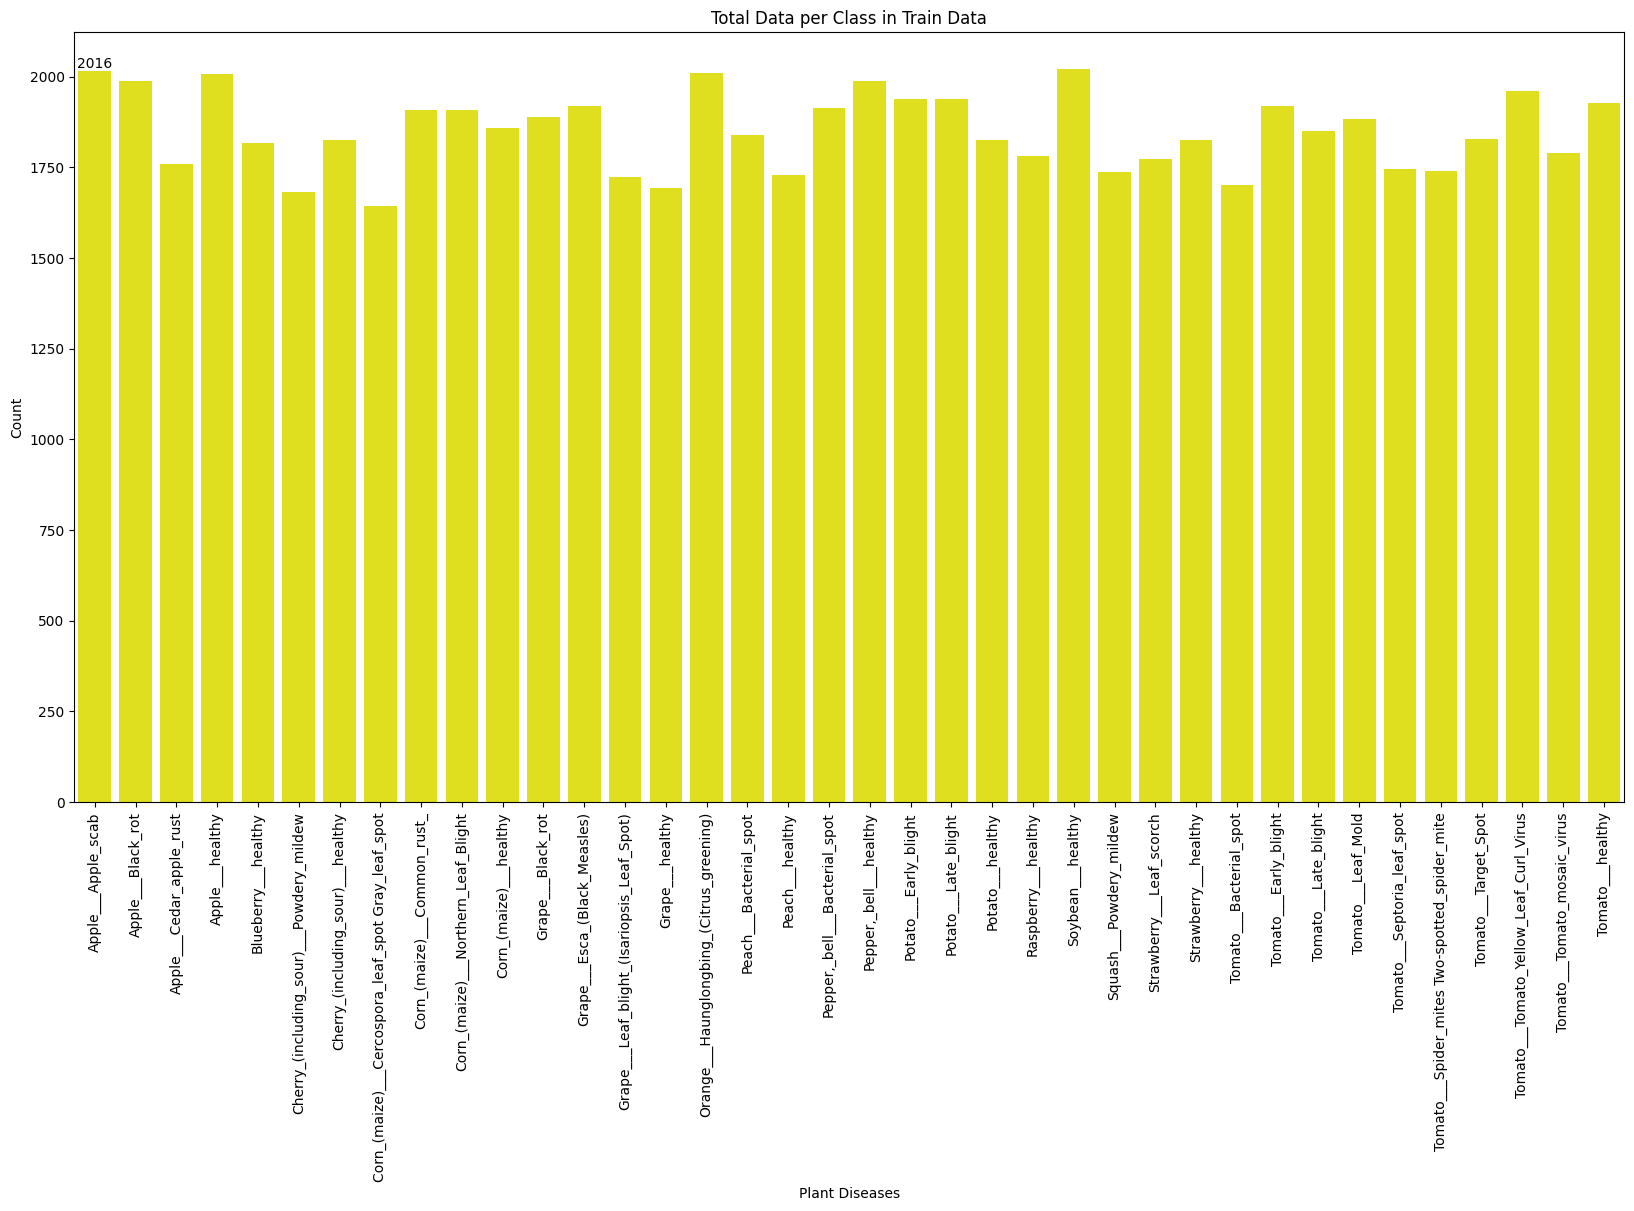

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(20, 10))

sns.barplot(data=train_counts_df, x=train_counts_df.index, y="Count", color="yellow")

plt.title("Total Data per Class in Train Data")

plt.xlabel("Plant Diseases")

plt.ylabel("Count")

plt.xticks(rotation=90)

ax = plt.gca()

for p in ax.patches:
  ax.text(p.get_x() + p.get_width() / 2.,
          p.get_height() + 10,
          '{:1.0f}'.format(p.get_height()),
          ha="center")

  plt.savefig("Total Data per Class in Train Data.jpg")
  plt.show()


### Visualizing the Distribution of Images per Class in the Validation Dataset

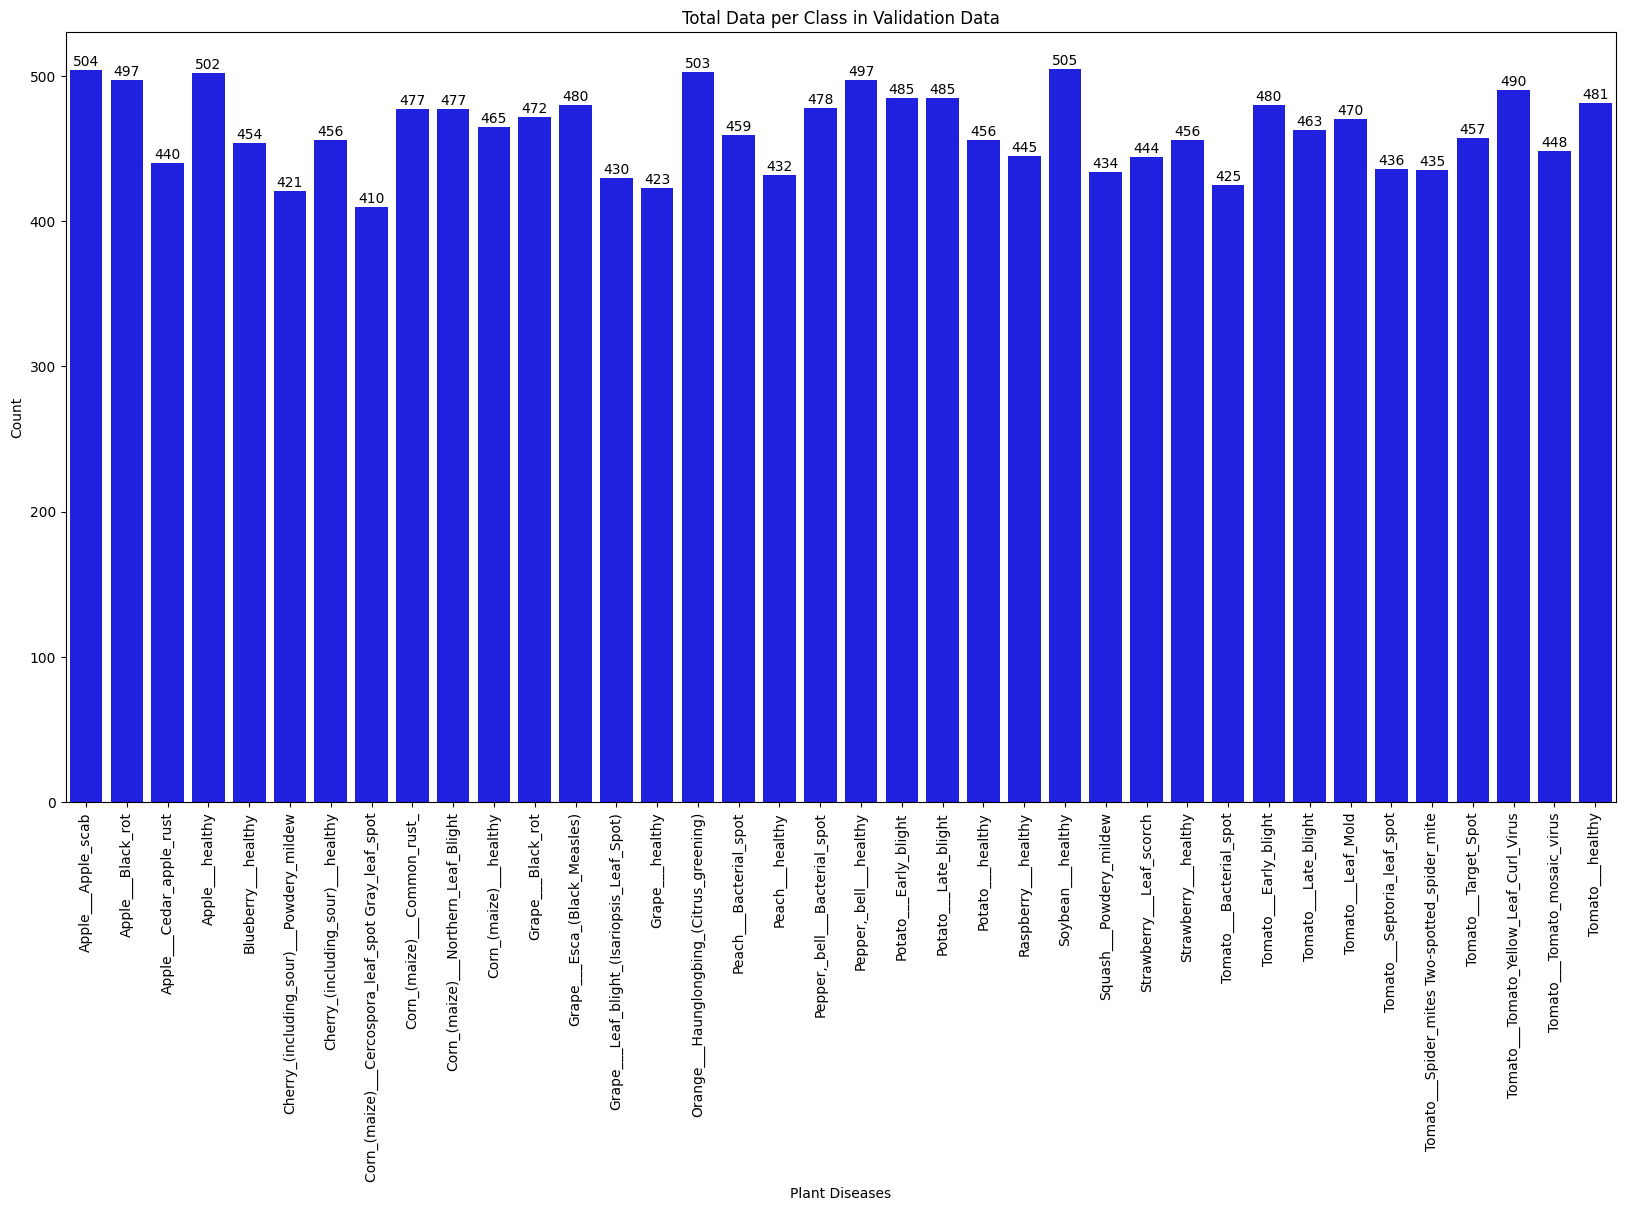

In [15]:
plt.figure(figsize=(20, 10))

sns.barplot(data=val_counts_df, x=val_counts_df.index, y="Count", color="blue")

plt.title("Total Data per Class in Validation Data")
plt.xlabel("Plant Diseases")
plt.ylabel("Count")

plt.xticks(rotation=90)
ax = plt.gca()
for p in ax.patches:
  ax.text(p.get_x() + p.get_width() / 2.,
          p.get_height() + 3,
          '{:1.0f}'.format(p.get_height()),
          ha="center")

plt.savefig("Total Data per Class in Validation Data.jpg")

plt.show()

### Extracting and Displaying Information About Plants and Diseases in the Dataset

In [16]:
all_diseases = sorted(os.listdir(train_dir))

plants = []

for cls in all_diseases:
    plant = cls.split("___")[0]

    if plant not in plants:
        plants.append(plant)

num_plants = len(plants)
print(f"Number of Plants: {num_plants} plants")


print("Kind of Plants: ")
for i, plant in enumerate(plants):
    print(f"{i+1}. {plant}")

diseases = []

for cls in all_diseases:
  disease = cls.split("___")[1]
  if disease not in diseases:
    diseases.append(disease)

num_diseases = len(diseases)
print(f"\nNumber of Diseases: {num_diseases} diseases")

print("Kind of Diseases: ")
for i, disease in enumerate(diseases):
    print(f"{i+1}. {disease}")


Number of Plants: 14 plants
Kind of Plants: 
1. Apple
2. Blueberry
3. Cherry_(including_sour)
4. Corn_(maize)
5. Grape
6. Orange
7. Peach
8. Pepper,_bell
9. Potato
10. Raspberry
11. Soybean
12. Squash
13. Strawberry
14. Tomato

Number of Diseases: 21 diseases
Kind of Diseases: 
1. Apple_scab
2. Black_rot
3. Cedar_apple_rust
4. healthy
5. Powdery_mildew
6. Cercospora_leaf_spot Gray_leaf_spot
7. Common_rust_
8. Northern_Leaf_Blight
9. Esca_(Black_Measles)
10. Leaf_blight_(Isariopsis_Leaf_Spot)
11. Haunglongbing_(Citrus_greening)
12. Bacterial_spot
13. Early_blight
14. Late_blight
15. Leaf_scorch
16. Leaf_Mold
17. Septoria_leaf_spot
18. Spider_mites Two-spotted_spider_mite
19. Target_Spot
20. Tomato_Yellow_Leaf_Curl_Virus
21. Tomato_mosaic_virus


### Displaying Random Sample of 10 Images from the Dataset with Labels and Shape

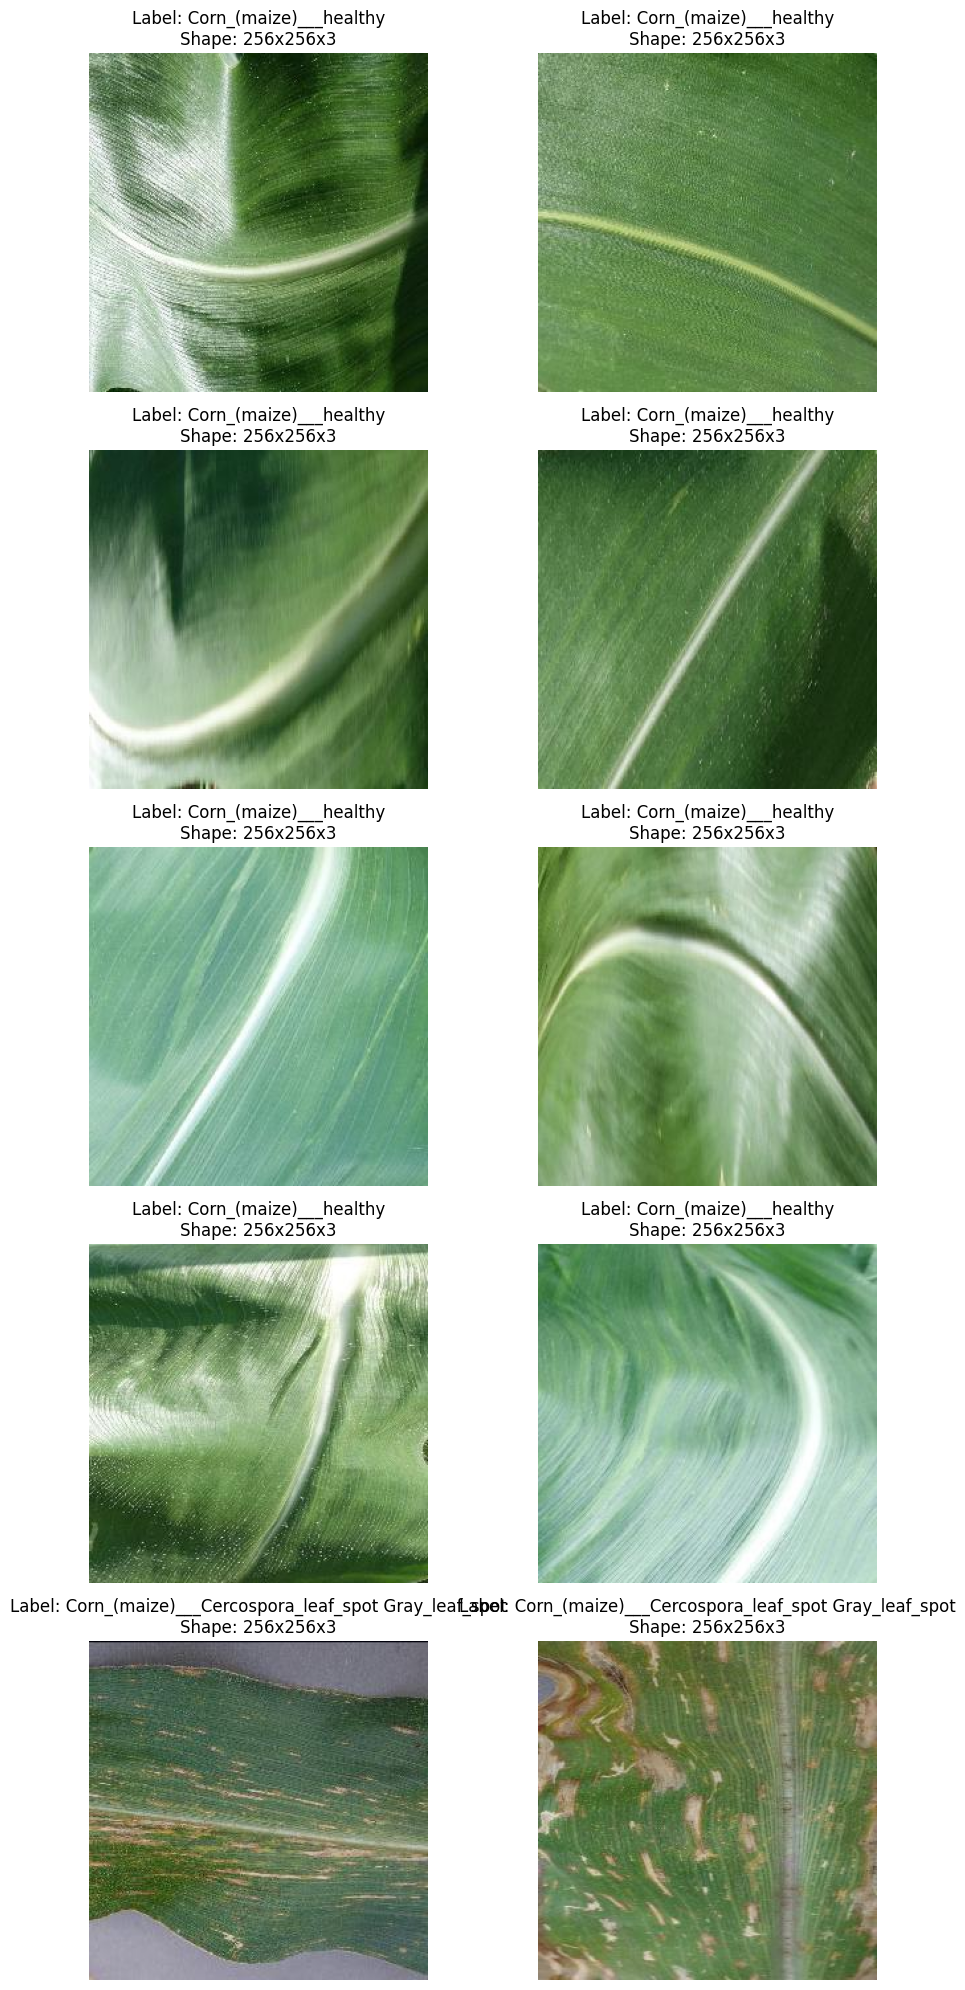

In [17]:
image_path_list = list(dataset_dir.glob("*/*/*.jpg"))

random_image_paths = random.sample(image_path_list, 10)

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(10, 20))

for i, ax in enumerate(axes.flat):

  random_image_path = random_image_paths[i]
  image_class = random_image_path.parent.stem

  image = Image.open(random_image_path)
  ax.imshow(image)

  ax.set_title(f"Label: {image_class}\nShape: {image.height}x{image.width}x{3 if image.mode == 'RGB' else 1}")

  ax.axis("off")

plt.tight_layout()
plt.show()

In [18]:


# dataset_path = '/content/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train'

# # Iterate through the folders and count images within each
# for dirname, _, filenames in os.walk(dataset_path):
#     # Count the number of image files with specific extensions
#     num_images = sum(1 for filename in filenames if filename.lower().endswith(('.png', '.jpg', '.jpeg')))

#     # Print the relative path and count for folders with images
#     if num_images:
#         relative_path = os.path.relpath(dirname, dataset_path)
#         print(f"{relative_path} : {num_images}")

### Defining Constants for Image Size, Batch Size, Channels, Epochs, and Input Shape

In [19]:
IMAGE_SIZE = 256
BATCH_SIZE = 64
CHANNELS = 3
EPOCHS = 5
INPUT_SHAPE = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

### Loading and Preprocessing the Training Dataset Using image_dataset_from_directory

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    shuffle=True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE)

Found 70295 files belonging to 38 classes.


In [21]:
class_names = dataset.class_names
n_classes = len(class_names)


### Splitting the Dataset into Train, Validation, and Test Partitions Using TensorFlow

In [22]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(dataset)
    if shuffle:
        ds = ds.shuffle(shuffle_size)

    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)

    train_ds = ds.take(train_size)

    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    print(f'TRAIN LENGTH: {len(train_ds)} | VALIDATION LENGTH: {len(val_ds)} | TEST LENGTH: {len(test_ds)} ')
    return train_ds, val_ds, test_ds

train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

TRAIN LENGTH: 879 | VALIDATION LENGTH: 109 | TEST LENGTH: 111 


### Optimizing Dataset Performance by Caching, Shuffling, and Prefetching

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

### Importing Necessary Modules for Building and Compiling the DenseNet201 Mode

In [24]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

### Loading and Saving Weights of the DenseNet201 Model

In [25]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.models import load_model

densenet_model = DenseNet201(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

densenet_model.save_weights("densenet_weights.h5")

74836368/74836368 [==============================] - 0s 0us/step


### Initializing TPU Strategy for Model Training

In [26]:
tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.TPUStrategy(tpu)

### Building and Compiling the Model with TPU Strategy Using DenseNet201

In [27]:
with tpu_strategy.scope():
    input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)


    base_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape=input_shape)


    rgb_input = Input(shape=input_shape)


    output = base_model(rgb_input)


    flatten_layer = Flatten()(output)
    dense_layer_1 = Dense(256, activation='relu')(flatten_layer)
    output_layer = Dense(n_classes, activation='softmax')(dense_layer_1)


    model = Model(inputs=rgb_input, outputs=output_layer)


    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


    model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 densenet201 (Functional)    (None, 1920)              18321984  
                                                                 
 flatten (Flatten)           (None, 1920)              0         
                                                                 
 dense (Dense)               (None, 256)               491776    
                                                                 
 dense_1 (Dense)             (None, 38)                9766      
                                                                 
Total params: 18823526 (71.81 MB)
Trainable params: 18594470 (70.93 MB)
Non-trainable params: 229056 (894.75 KB)
_________________________________________________________________


### Compiling and Training the Model with Adam Optimizer and Sparse Categorical Crossentropy Loss

In [32]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

history = model.fit(
        train_ds,
        epochs=EPOCHS,
        batch_size=BATCH_SIZE,
        verbose=1,
        validation_data=val_ds
    )

Epoch 1/5
879/879 [==============================] - 354s 313ms/step - loss: 0.0633 - accuracy: 0.9794 - val_loss: 0.1447 - val_accuracy: 0.9636
Epoch 2/5
879/879 [==============================] - 270s 307ms/step - loss: 0.0481 - accuracy: 0.9843 - val_loss: 0.1458 - val_accuracy: 0.9614
Epoch 3/5
879/879 [==============================] - 270s 307ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0580 - val_accuracy: 0.9841
Epoch 4/5
879/879 [==============================] - 271s 308ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.3490 - val_accuracy: 0.9342
Epoch 5/5
879/879 [==============================] - 271s 308ms/step - loss: 0.0348 - accuracy: 0.9893 - val_loss: 0.0910 - val_accuracy: 0.9789


### Evaluating the Model Performance on Test Data

In [40]:
scores = model.evaluate(test_ds)

111/111 [==============================] - 10s 80ms/step - loss: 0.1070 - accuracy: 0.9761


### Saving the Trained Model for Future Use

In [30]:
model_version = "model_train_denseNet"
model.save(f'models/{model_version}')

#### loss curve , accuracy with visualization

In [34]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

fig = make_subplots(rows=1, cols=2, subplot_titles=['Accuracy', 'Loss'])

fig.add_trace(go.Scatter(x=list(range(EPOCHS)), y=acc, mode='lines', name='Training Accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=list(range(EPOCHS)), y=val_acc, mode='lines', name='Validation Accuracy'), row=1, col=1)

fig.add_trace(go.Scatter(x=list(range(EPOCHS)), y=loss, mode='lines', name='Training Loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=list(range(EPOCHS)), y=val_loss, mode='lines', name='Validation Loss'), row=1, col=2)

fig.update_layout(title_text='Training and Validation Metrics', template='plotly_dark')

fig.update_xaxes(title_text='Epochs', row=1, col=1)
fig.update_xaxes(title_text='Epochs', row=1, col=2)

fig.update_yaxes(title_text='Accuracy', row=1, col=1)
fig.update_yaxes(title_text='Loss', row=1, col=2)

fig.show()

### Model Evaluation and Performance Metrics: Classification Report, Confusion Matrix, and ROC Curve Analysis

2/2 [==============================] - 1s 50ms/step


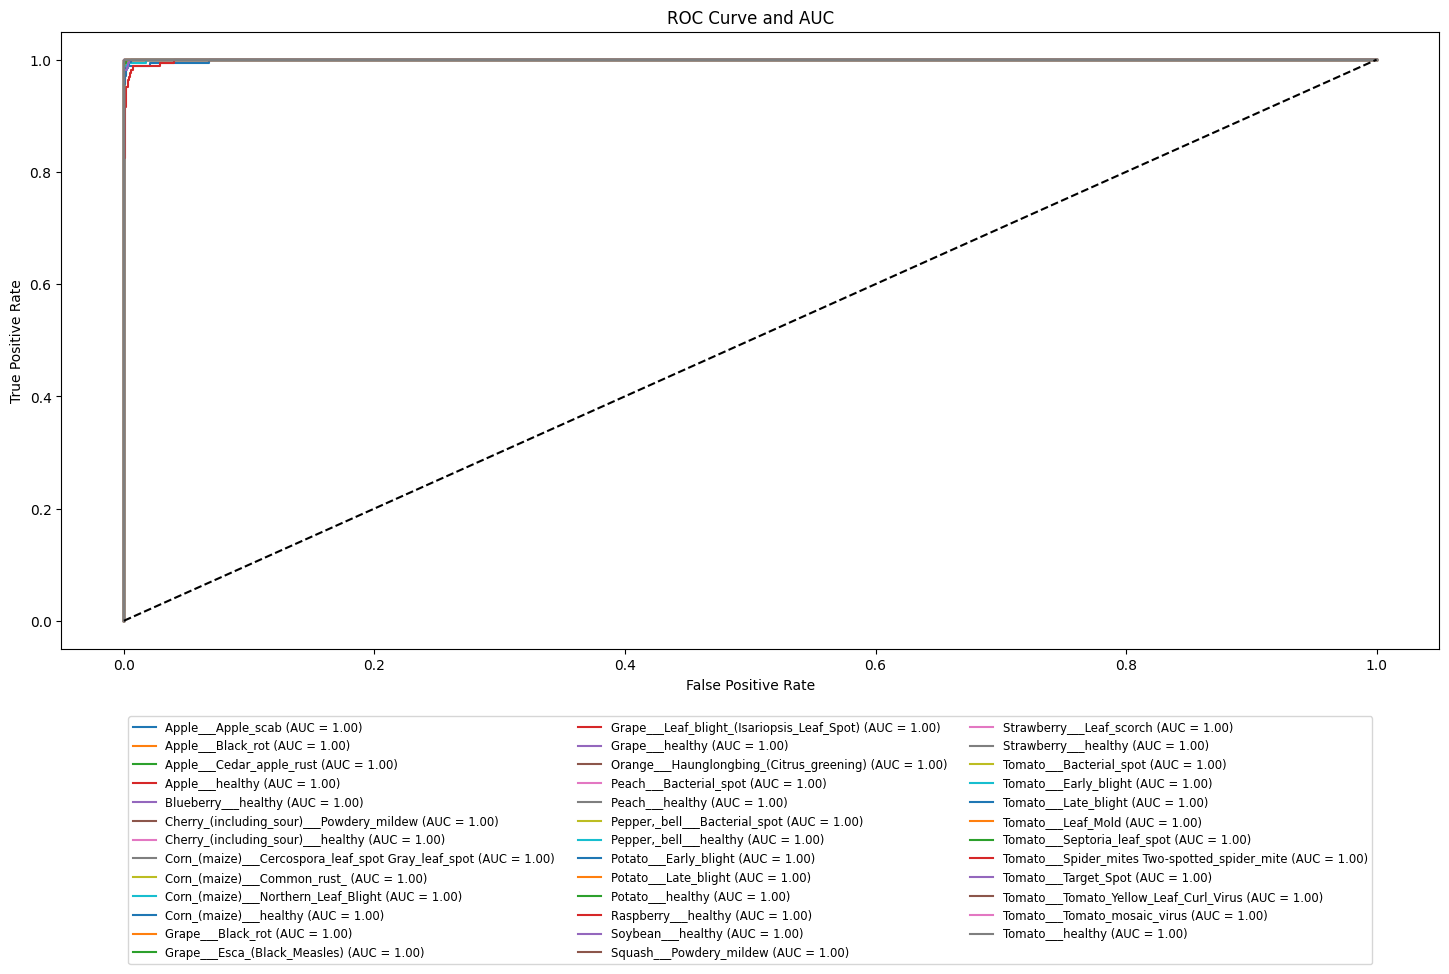

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Function to get model predictions and evaluate performance
def evaluate_and_plot_roc_auc(model, val_ds, test_ds, n_classes):
    all_preds = []
    all_labels = []
    all_probs = []

    # Evaluate on the validation set
    for images, labels in val_ds:
        probs = model.predict(images)
        preds = np.argmax(probs, axis=-1)  # Get the predicted class
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())  # Store true labels
        all_probs.extend(probs)  # Store predicted probabilities

    # Convert to numpy arrays
    all_preds = np.array(all_preds)
    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    # One-hot encode the true labels for multi-class ROC and AUC calculation
    all_labels_bin = label_binarize(all_labels, classes=range(n_classes))

    # Compute the ROC curve and AUC for each class
    plt.figure(figsize=(15, 10))  # Increase figure size
    for i, class_name in enumerate(class_names):
        fpr, tpr, _ = roc_curve(all_labels_bin[:, i], all_probs[:, i])
        auc_score = roc_auc_score(all_labels_bin[:, i], all_probs[:, i])
        plt.plot(fpr, tpr, label=f"{class_name} (AUC = {auc_score:.2f})")

    # Plot the diagonal line for random guessing
    plt.plot([0, 1], [0, 1], "k--")
    plt.title("ROC Curve and AUC")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")

    # Adjust legend
    plt.legend(
        loc="upper center",
        bbox_to_anchor=(0.5, -0.1),  # Move legend to the bottom
        ncol=3,  # Split into 3 columns
        fontsize="small"  # Reduce font size for readability
    )
    plt.tight_layout()
    plt.savefig('Roc.png')  # Adjust layout to prevent overlap
    plt.show()

# Call the function to evaluate the model and plot the ROC curve
evaluate_and_plot_roc_auc(model, val_ds, test_ds, n_classes)


In [52]:
from sklearn.metrics import classification_report
y_true = []
y_pred = []

for batch in val_ds:
    images, labels = batch
    predictions = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

report = classification_report(y_true, y_pred, target_names=class_names)
print("Classification Report:\n", report)



Classification Report:
                                                     precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      1.00      0.99       218
                                 Apple___Black_rot       1.00      0.99      0.99       210
                          Apple___Cedar_apple_rust       1.00      0.93      0.97       164
                                   Apple___healthy       1.00      0.99      1.00       188
                               Blueberry___healthy       0.99      0.99      0.99       182
          Cherry_(including_sour)___Powdery_mildew       1.00      0.99      1.00       167
                 Cherry_(including_sour)___healthy       0.97      0.99      0.98       174
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.99      0.99       150
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       212
               Corn_(maize)___Northern_Leaf_Blight     

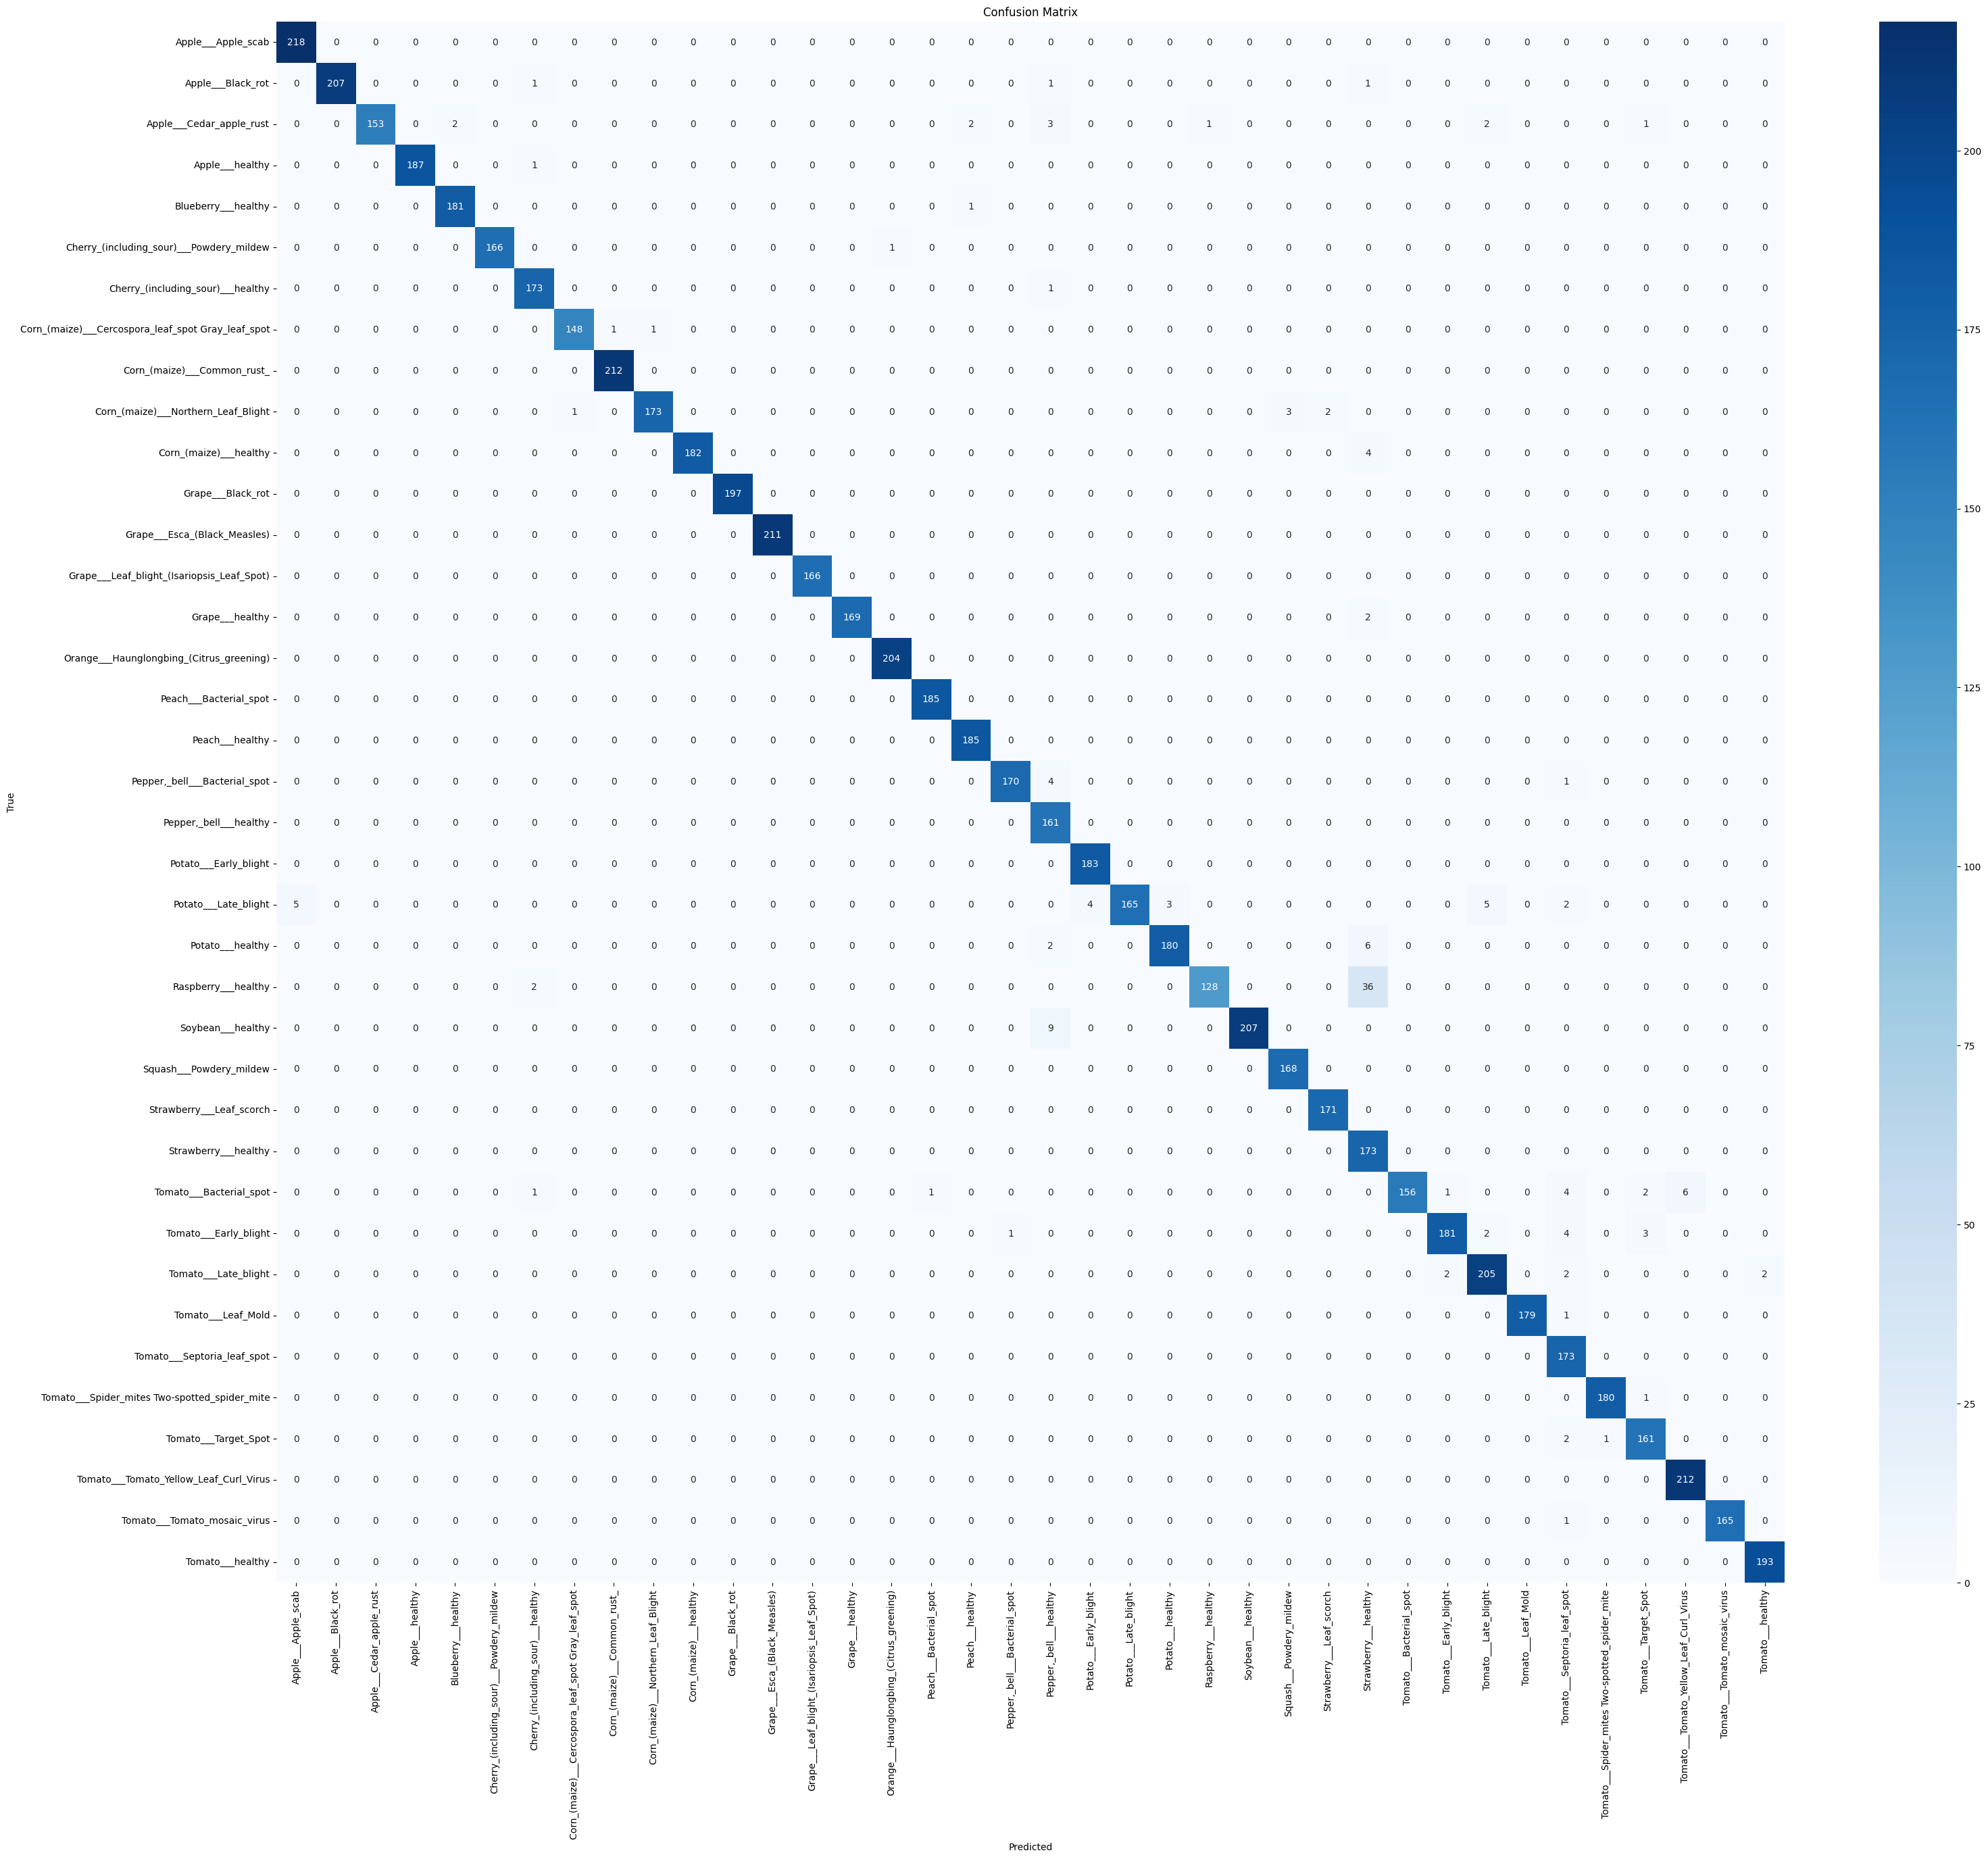

In [51]:
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(36, 30))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.savefig('CM.png')
plt.show()